# Exploratory Analysis of Businesses

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
from ast import literal_eval
from collections import Counter
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt # for Data visualization

%matplotlib inline

In [56]:
business_json_path = './yelp_dataset/yelp_academic_dataset_business.json'
df= pd.read_json(business_json_path, lines=True)

In [5]:
print(len(df))

160585


In [7]:
#Only opened business

In [57]:
df = df[df['is_open']==1]
df

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
2,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,4720 Hawthorne Ave,Portland,OR,97214,45.511907,-122.613693,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Antiques, Fashion, Used, Vintage & Consignment...","{'Thursday': '11:0-18:0', 'Friday': '11:0-18:0..."
3,oaepsyvc0J17qwi8cfrOWg,Great Clips,2566 Enterprise Rd,Orange City,FL,32763,28.914482,-81.295979,3.0,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Beauty & Spas, Hair Salons",None
4,PE9uqAjdw0E4-8mjGl3wVA,Crossfit Terminus,1046 Memorial Dr SE,Atlanta,GA,30316,33.747027,-84.353424,4.0,14,1,"{'GoodForKids': 'False', 'BusinessParking': '{...","Gyms, Active Life, Interval Training Gyms, Fit...","{'Monday': '16:0-19:0', 'Tuesday': '16:0-19:0'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160578,rCTPX2ehHPFnHTe0aK9ZPQ,JDM Toyota & Honda Specialist,6629 E Colonial Dr,Orlando,FL,32807,28.566161,-81.298123,4.5,8,1,{'BusinessAcceptsCreditCards': 'True'},"Automotive, Tires, Towing, Auto Repair","{'Monday': '9:0-18:0', 'Tuesday': '9:0-18:0', ..."
160579,d6iEdtgLKelWKtb-2UmE2A,Master Finish Mobile Auto Detailing,29 Greenwood Ave,Needham,MA,02492,42.282399,-71.225169,1.0,11,1,{'BusinessAcceptsCreditCards': 'True'},"Automotive, Auto Detailing","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
160580,D2mHoIDXx9N8mS1pGoKV9Q,Eleven Oaks Realty,,Austin,TX,78701,30.272921,-97.744386,4.0,8,1,None,"Real Estate, Real Estate Services, Home Servic...","{'Monday': '9:0-19:0', 'Tuesday': '9:0-19:0', ..."
160581,bQX-kwVTyZgcdZGEPzce6Q,Webb's Honey,21777 State Rd 520,Orlando,FL,32833,28.499836,-81.047478,4.5,18,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsPri...","Health Markets, Food, Specialty Food, Grocery","{'Monday': '10:0-18:0', 'Tuesday': '10:0-18:0'..."


## Top 20 cities by # of businesses

In [9]:
pd.DataFrame(Counter(df.city.values).most_common(20), columns=['city','businesses'])

,city,businesses
0,Austin,16799
1,Portland,13149
2,Vancouver,9709
3,Atlanta,9427
4,Orlando,8549
5,Boston,5821
6,Columbus,5160
7,Boulder,1912
8,Beaverton,1764
9,Cambridge,1638


## Distribution of review counts

<AxesSubplot:ylabel='Frequency'>

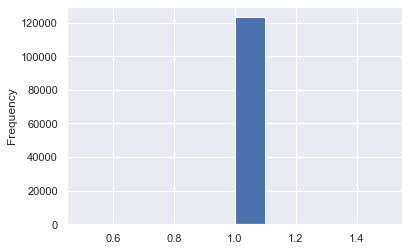

In [32]:
df['business_id'].value_counts(ascending=False).plot.hist()

Text(0.5, 1.0, 'Businesses by Review Count')

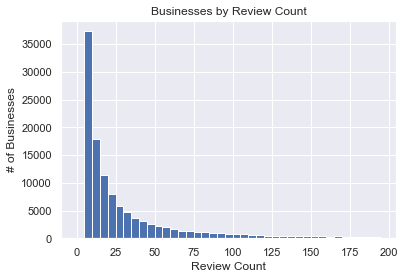

In [35]:
# Plot histogram in prper format
#plt.figure(figsize=(16,9)) # figure ration 16:9
sns.set() # for style
 
plt.hist(df.review_count, bins=range(0,200,5))
plt.xlabel('Review Count')
plt.ylabel('# of Businesses')
plt.title('Businesses by Review Count')

## Distribution of stars

Text(0.5, 1.0, 'Businesses by Stars')

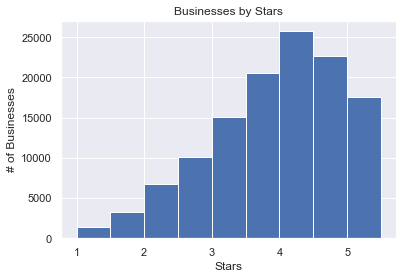

In [37]:
sns.set() # for style
plt.hist(df.stars, bins=np.linspace(1.,5.5,10))
plt.xlabel('Stars')
plt.ylabel('# of Businesses')
plt.title('Businesses by Stars')

## Business Categories

In [58]:
df_explode = df.assign(categories = df.categories
                         .str.split(', ')).explode('categories')
df_explode

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...",Gastropubs,"{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...",Food,"{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...",Beer Gardens,"{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...",Restaurants,"{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...",Bars,"{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160581,bQX-kwVTyZgcdZGEPzce6Q,Webb's Honey,21777 State Rd 520,Orlando,FL,32833,28.499836,-81.047478,4.5,18,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsPri...",Grocery,"{'Monday': '10:0-18:0', 'Tuesday': '10:0-18:0'..."
160583,GB75wPibj3IjNauaoCxyGA,Havana Cafe,910 NW 14th St,Portland,OR,97209,45.529647,-122.685153,4.0,10,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsDel...",Cuban,None
160583,GB75wPibj3IjNauaoCxyGA,Havana Cafe,910 NW 14th St,Portland,OR,97209,45.529647,-122.685153,4.0,10,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsDel...",Sandwiches,None
160583,GB75wPibj3IjNauaoCxyGA,Havana Cafe,910 NW 14th St,Portland,OR,97209,45.529647,-122.685153,4.0,10,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsDel...",Restaurants,None


In [65]:
pd.DataFrame(Counter(df_explode.categories.values).most_common(20), columns=['categories','businesses'])

,categories,businesses
0,Restaurants,32022
1,Food,20418
2,Shopping,20309
3,Home Services,14795
4,Health & Medical,13630
5,Beauty & Spas,13569
6,Local Services,10677
7,Automotive,8886
8,Event Planning & Services,7856
9,Nightlife,7829
